### analytical part

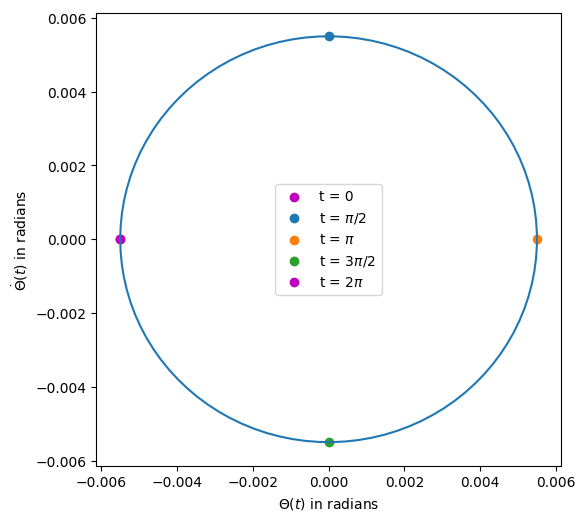

In [1]:
import numpy as np
from matplotlib import pyplot as plt

pi = np.pi
def theta(t):
    A = -0.0055
    wr = 1
    return A*np.cos(wr*t)

def thetadot(t):
    A = -0.0055
    wr = 1
    return -A*np.sin(wr*t)

t = np.linspace(0, 2*pi, 100)
plt.figure(figsize=(6,6), dpi = 100)
plt.plot(theta(t), thetadot(t))
plt.scatter(theta(0), thetadot(0), label = "t = 0", c = 'm')
plt.scatter(theta(pi/2), thetadot(pi/2), label = "t = $\pi/2$")
plt.scatter(theta(pi), thetadot(pi), label = "t = $\pi$")
plt.scatter(theta(3*pi/2), thetadot(3*pi/2), label = "t = $3\pi/2$")
plt.scatter(theta(2*pi), thetadot(2*pi), label = "t = $2\pi$", c = 'm')
plt.xlabel("$\Theta(t)$ in radians", )
plt.ylabel("$\dot\Theta(t)$ in radians")
plt.legend(loc = "center")
plt.show()


### Numerical part

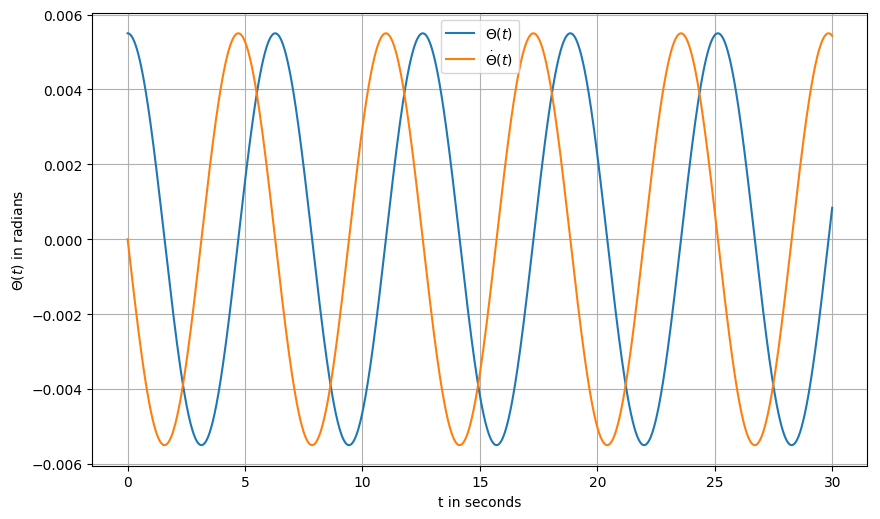

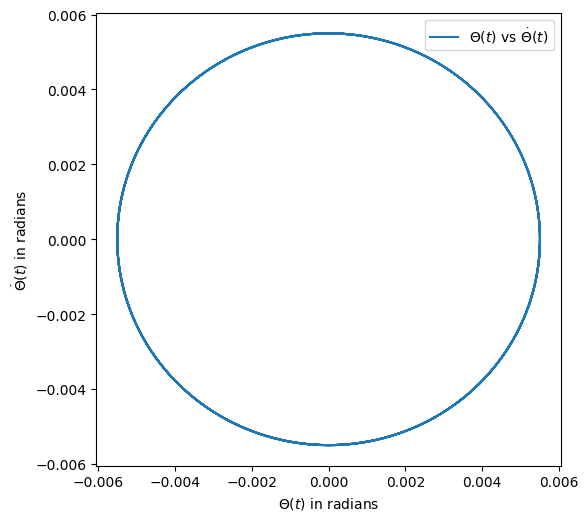

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def Stab(x0, xt0):
    N = 30000
    dt = 0.001
    T = np.arange(N) * dt
    X, Xt = np.zeros(N+1), np.zeros(N)
    X[0] = x0
    Xt[0] = xt0
    X[1] = dt * xt0 + x0
    omg_r = 1
    for i in range(1,N):
        X[i + 1] = -omg_r**2 * dt**2 * np.sin(X[i]) + 2*X[i] - X[i-1]
        Xt[i] = (X[i+1] - X[i]) / dt

    return T,X[:-1], Xt


plt.figure(figsize=(10,6), dpi = 100)
plt.plot(Stab(0.0055,0)[0], Stab(0.0055,0)[1], label = "$\Theta(t)$")        #t vs theta
plt.plot(Stab(0.0055,0)[0], Stab(0.0055,0)[2], label = "$\dot{\Theta}(t)$")  #t vs thetadot
plt.legend()
plt.xlabel("t in seconds")
plt.ylabel("$\Theta(t)$ in radians")
plt.grid()

plt.figure(figsize=(6,6), dpi = 100)
plt.plot(Stab(0.0055,0)[1], Stab(0.0055,0)[2], label = "$\Theta(t)$ vs $\dot{\Theta}(t)$" ) 
plt.xlabel("$\Theta(t)$ in radians")
plt.ylabel("$\dot{\Theta}(t)$ in radians")
plt.legend()


plt.show()

        
        




In [3]:
print(np.max(Stab(np.pi - 0.012,0)[0]))

29.999


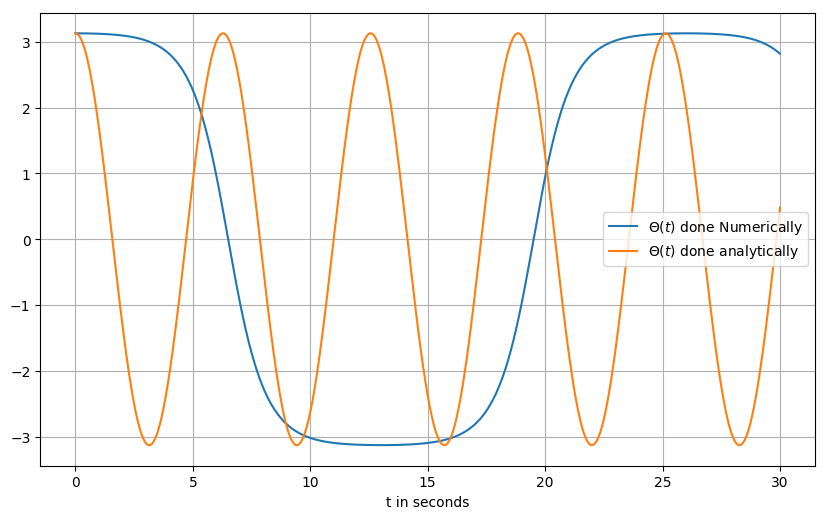

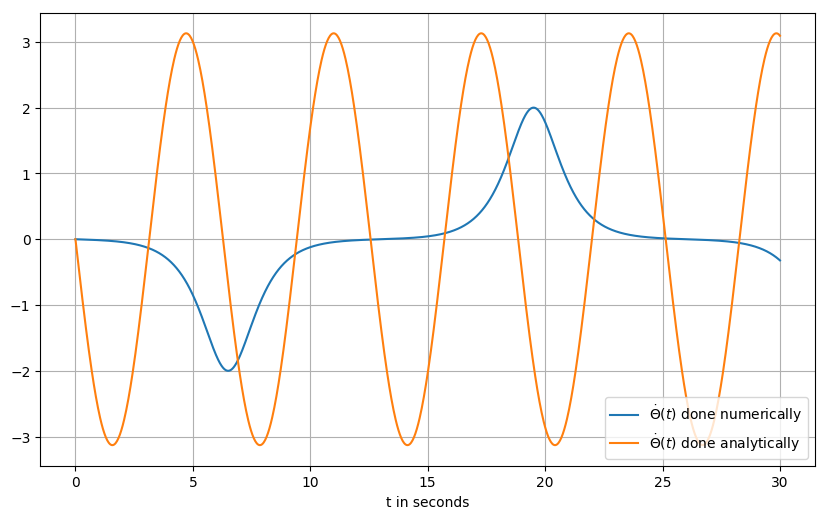

In [4]:
def theta(t):
    A = np.pi - 0.012
    wr = 1
    return A*np.cos(wr*t)

def thetadot(t):
    A = np.pi - 0.012
    wr = 1
    return -A*np.sin(wr*t)

t = np.linspace(0, 30, 1000)


plt.figure(figsize=(10,6), dpi = 100)

plt.plot(Stab(np.pi - 0.012,0)[0], Stab(np.pi - 0.012,0)[1], label = "$\Theta(t)$ done Numerically")  #t vs theta
plt.plot(t, theta(t), label = "$\Theta(t)$ done analytically")
plt.legend()
plt.xlabel("t in seconds")
plt.grid()

plt.figure(figsize=(10,6), dpi = 100)
plt.plot(Stab(np.pi - 0.012,0)[0], Stab(np.pi - 0.012,0)[2], label = "$\dot{\Theta}(t)$ done numerically") #t vs thetadot
plt.plot(t, thetadot(t), label = "$\dot{\Theta}(t)$ done analytically")
plt.legend()
plt.xlabel("t in seconds")
plt.grid()


plt.show()